## 데이터 탐색

이번 데이터의 목적은 집의 정보를 가지고 가격을 예측하는 회귀문제 입니다. 

평가로는 RMSE를 사용합니다. 



In [1]:
# Loading packages
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [2]:
df_train = pd.read_csv('/Users/gwanghunlee/Documents/EX02/data/data/train.csv')
df_test  = pd.read_csv('/Users/gwanghunlee/Documents/EX02/data/data/test.csv')

In [3]:
print("train.csv. Shape: ",df_train.shape)
print("test.csv. Shape: ",df_test.shape)

train.csv. Shape:  (15035, 21)
test.csv. Shape:  (6468, 20)


훈련과 평가 데이터의 크기는 15000과 6500 정도로 확인됩니다.
feature의 갯수는 20개로 확인됩니다.

### 변수설명
상세한 변수 설명은 gpt를 참고했습니다.
- ID : 집을 구분하는 번호
- date : 집을 구매한 날짜
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수
- bathrooms : 화장실의 수
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : Has been viewed
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- yr_renovated : 집을 재건축한 년도
- zipcode : 우편번호
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 주차 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음

In [4]:
print(df_train.shape)
print(df_train.nunique())

(15035, 21)
id               15035
date               365
price             3263
bedrooms            11
bathrooms           29
sqft_living        863
sqft_lot          7678
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         789
sqft_basement      271
yr_built           116
yr_renovated        65
zipcode             70
lat               4692
long               716
sqft_living15      682
sqft_lot15        6958
dtype: int64


In [5]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


- date의 경우 yyyy-mm-dd + T000000의 형태로, 필요한 부분은 앞의 8자리
- bathrooms의 경우 소숫점의 값이 보이는데, 이는 미국의 기준에 따른 것이라고 함 
- sqft_living 과 sqft_living15처럼 비슷한 값이 보입니다. 둘은 15년도를 기준으로 크기 계산의 기준에 따라 다른 값을 보임. 둘의 차이가 꽤 큰 부분도 있어서 이를 잘 활용해야 할 것 같음.

### 변수 시각화 ( price )

In [6]:
#descriptive statistics summary
df_train['price'].describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Density'>

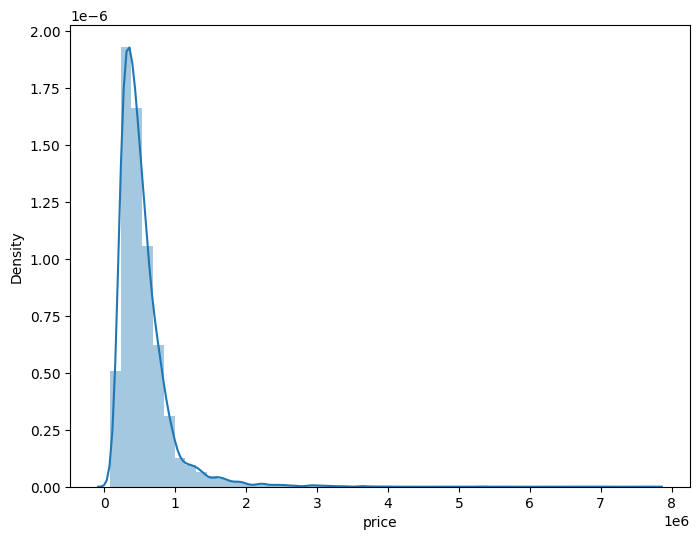

In [7]:
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['price'])

위의 목적변수(price)의 경우 그래프가 왼쪽으로 치우쳐져 있고, 분산 또한 매우 큰 것을 확인할 수 있음.  
모델을 회귀모델을 사용할 것이기 때문에 정규화(log)를 통해 price의 분포가 정규분포를 가지도록 만들 예정. 

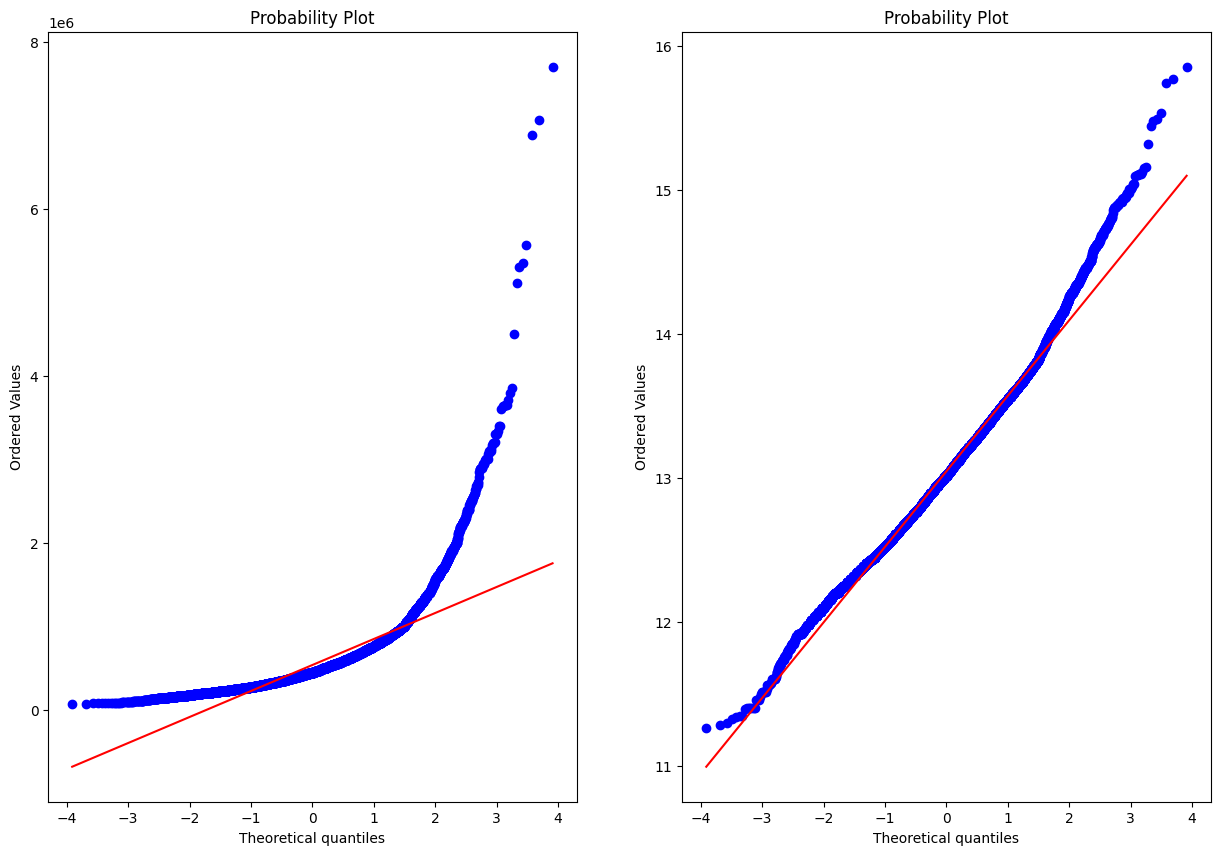

In [8]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_train['price'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['price']), plot=plt)

<Axes: xlabel='price', ylabel='Density'>

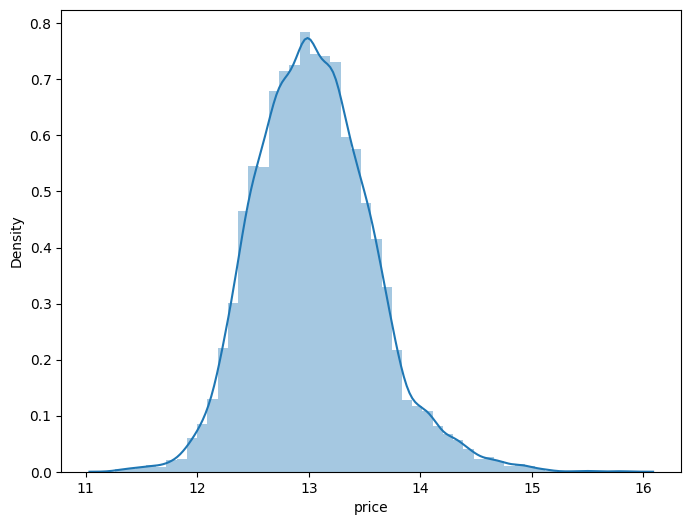

In [9]:
df_train['price'] = np.log1p(df_train['price'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['price'])

### 변수시각화 ( feature )

아래는 price와 가장 상관관계가 높은 순서대로 본 히트맵
전부 보는 것이 아니라 분석의 편의를 위해 상관도가 높은 상위 10개의 값만 뽑아냄.

Top-10 cor with price: ['price', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'bedrooms', 'floors', 'view']


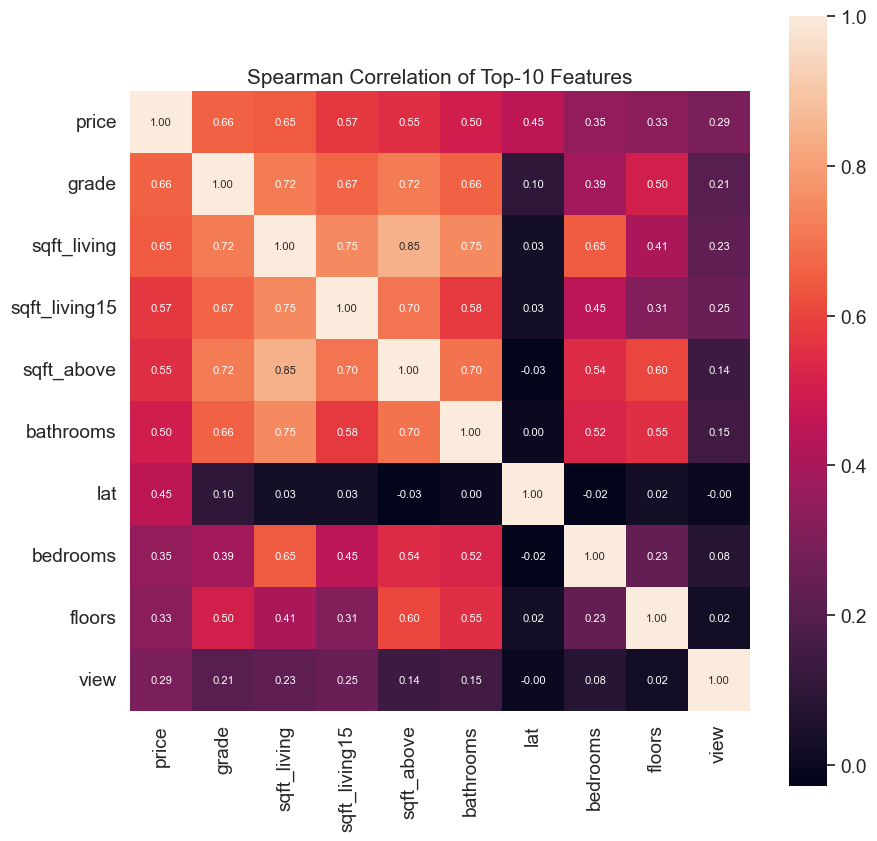

In [10]:
import numpy as np

# 1) 숫자형 컬럼만 추출
numeric_df = df_train.select_dtypes(include=[np.number])

# 2) 스피어만 상관계수 절대값 행렬
cor_abs = numeric_df.corr(method='spearman').abs()

# 3) price와 상관관계가 높은 상위 10개 컬럼 뽑기
cor_cols = cor_abs.nlargest(n=10, columns='price').index

print("Top-10 cor with price:", cor_cols.tolist())

# 4) 해당 컬럼들로 heatmap 그리기
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# spearman 계수 매트릭스
spearman_matrix = sp.stats.spearmanr(numeric_df[cor_cols]).correlation

plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(
    spearman_matrix,
    fmt='.2f',
    annot=True,
    square=True,
    annot_kws={'size':8},
    xticklabels=cor_cols,
    yticklabels=cor_cols
)
plt.title('Spearman Correlation of Top-10 Features')
plt.show()


등급 -> 집의 면적 -> 위치 -> 층수 -> 뷰 순서로 상관계수가 측정됨


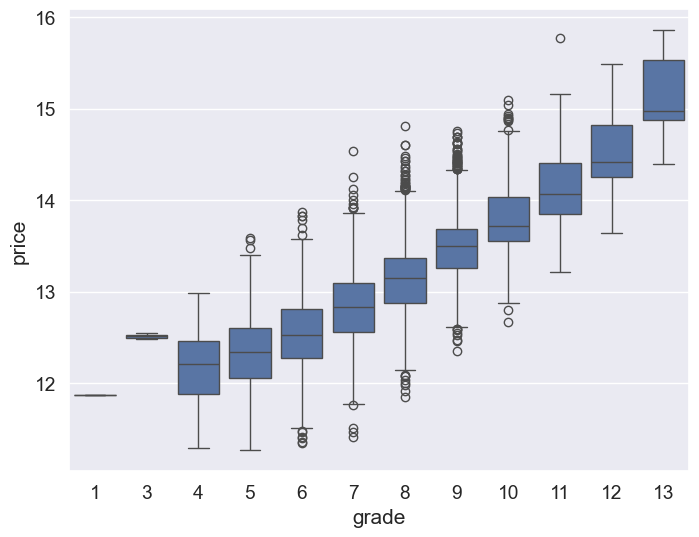

In [11]:
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

집의 등급이 높으면 가격이 좋아짐    
그리고 전박적으로 우상향을 가리킴. 하지만 
- ***등급 3의 경우 값이 등급 4보다 큰 이유***
- ***등급 7,8,9에서 이상치가 많은 이유*** 
- ***등급 8과 11에서 차이가 큰 이상치가 나타나는 이유***

위의 3가지를 고민해봐야함 (이상치 제거를 통해 없앨듯...)

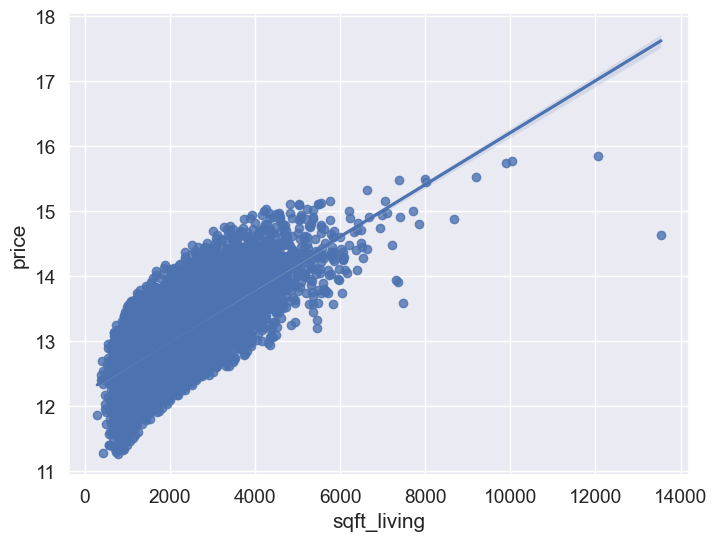

In [12]:
data = pd.concat([df_train['price'], df_train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living', y="price", data=data)

### sqlf_living / sqlf_lot
(주거 평방 피트 / 부지 평방 피트)

sqlf_living은 실제 사용 면적 / sqlf_lot는 총 부지의 면적으로 생각하면 된다고 함...

전반적으로 선형성을 보이지만 가격이 14~15사이에 sqft_living이 14000에 가까운 값은 꽤나 이상한 값(이상치)으로 생각되어집니다. 제거할지 말지는 저 값을 확인해보고 결정하겠습니다. 

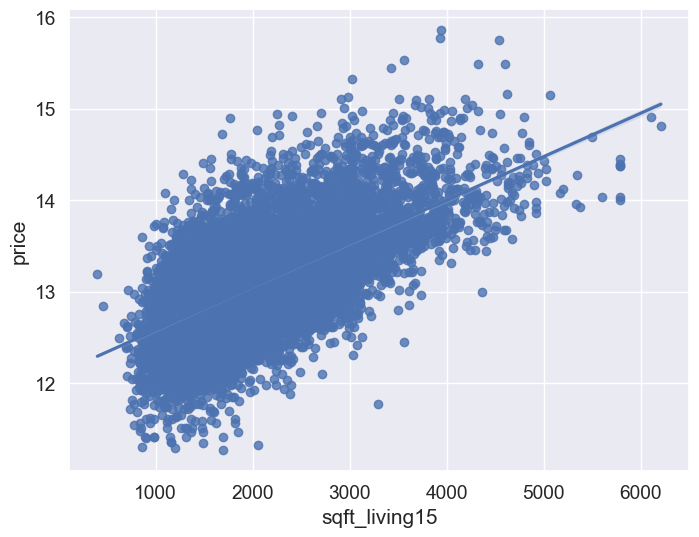

In [13]:
data = pd.concat([df_train['price'], df_train['sqft_living15']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living15', y="price", data=data)

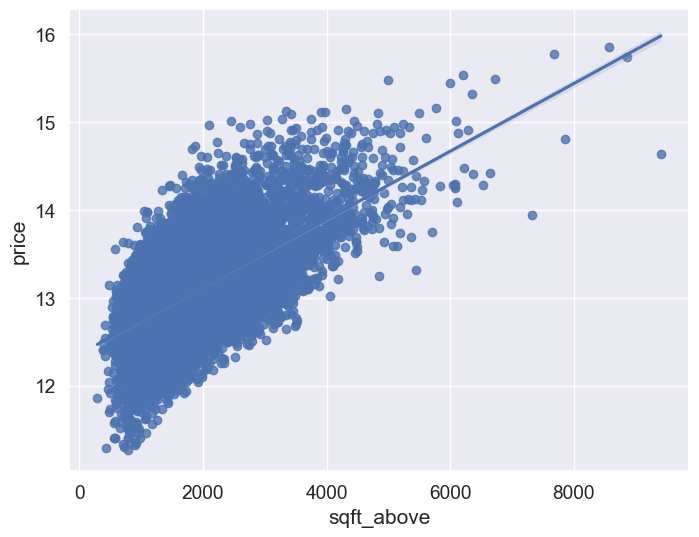

In [14]:
data = pd.concat([df_train['price'], df_train['sqft_above']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_above', y="price", data=data)

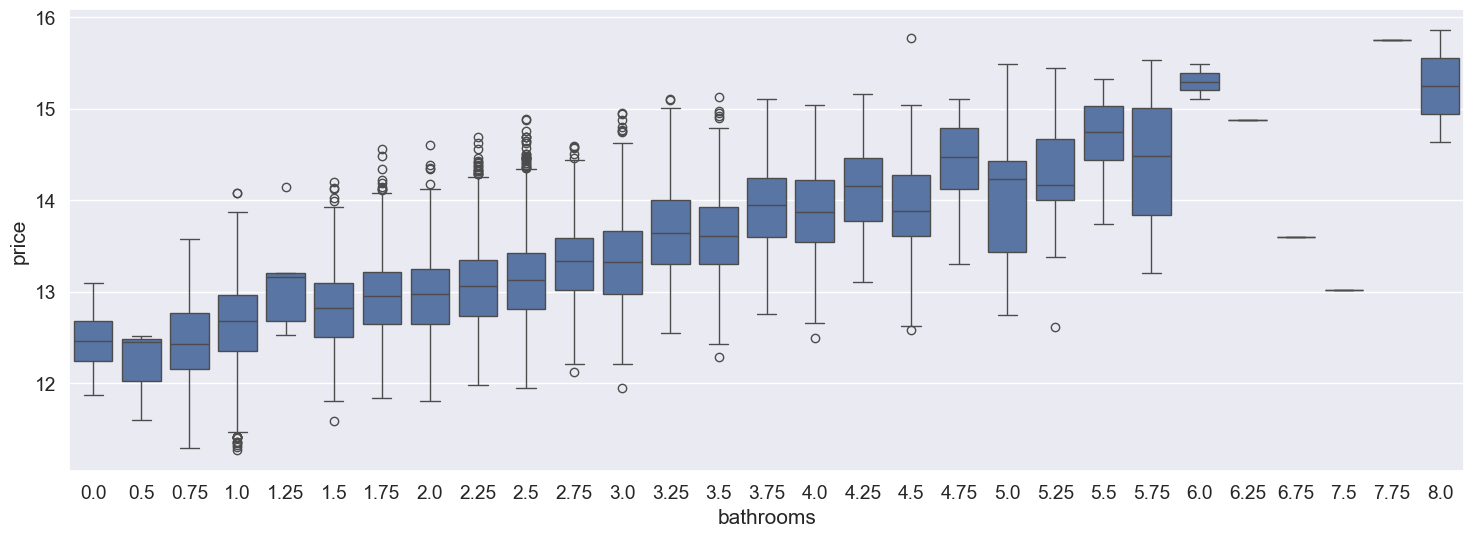

In [15]:
data = pd.concat([df_train['price'], df_train['bathrooms']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='bathrooms', y="price", data=data)

bathrooms같은경우 소숫점이 있음.
각각의 값이 의미하는것은 아래와 같고 위의 값만을 가지고 각각의 값이 몇개있는지는 구분하기 힘들어 보임... 의미가 있나...
- 0.5 : 세면대, 화장실 
- 0.75 : 세면대, 화장실, 샤워실
- 1 : 세면대, 화장실, 샤워실, 욕조 

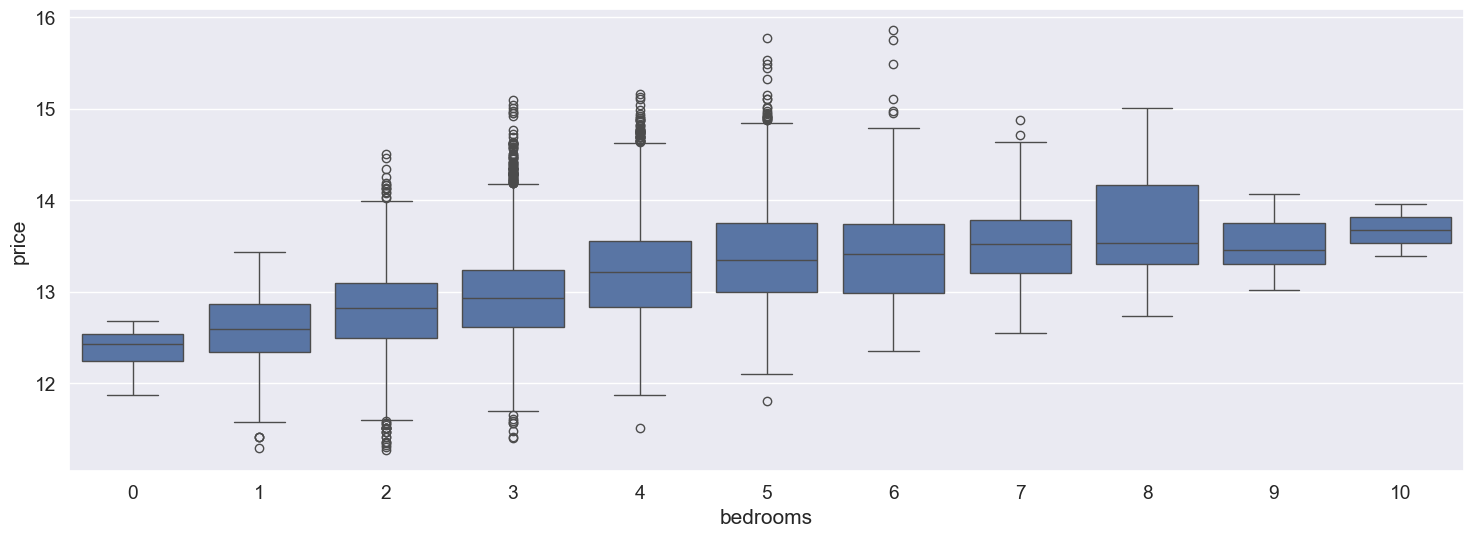

In [16]:
data = pd.concat([df_train['price'], df_train['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x='bedrooms', y="price", data=data)

방의 경우 median 값을 중심으로 살펴보면 어느정도 우상향 선형관계. 
그리고 방의 갯수가 2~6의 경우 방이 적음에도 값이 큰 값들이 많다... 집값이 비싼건가? 지역에따라

### 결측치 

In [17]:
# df_all 은 분석할 DataFrame
missing_counts = df_train.isnull().sum()
print(missing_counts[missing_counts > 0])

Series([], dtype: int64)


다행히도 위의 결과를 보면 결측치가 없는 상황

### feature의 유니크한 갯수

In [18]:
import plotly.graph_objs as go
import random
import plotly.offline as py
py.init_notebook_mode(connected=True)

def generate_color():
    """랜덤 RGB 16진수 색상을 반환"""
    return '#{:02x}{:02x}{:02x}'.format(
        random.randint(0, 255),
        random.randint(0, 255),
        random.randint(0, 255)
    )

### 유니크 갯수 계산
train_unique = []
columns = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade']

for i in columns:
    train_unique.append(len(df_train[i].unique()))
unique_train = pd.DataFrame()
unique_train['Columns'] = columns
unique_train['Unique_value'] = train_unique

data = [
    go.Bar(
        x = unique_train['Columns'],
        y = unique_train['Unique_value'],
        name = 'Unique value in features',
        textfont=dict(size=20),
        marker=dict(
        line=dict(
            color= generate_color(),
            #width= 2,
        ), opacity = 0.45
    )
    ),
    ]
layout= go.Layout(
        title= "Unique Value By Column",
        xaxis= dict(title='Columns', ticklen=5, zeroline=False, gridwidth=2),
        yaxis= dict(title='Value Count', ticklen=5, gridwidth=2),
        showlegend=True
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='skin')

view의 유니크갯수가 5인걸로 보니 grade같이 순위형변수로 생각되어지고 waterfront의 경우는 2개로 있다/없다는 상징하는 것 같습니다. 위에서 몇몇 값들을 자세히 살펴보면, 

In [19]:
df_train['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

층수의 경우 1.5, 2.5, 3.5와 같이 소수점을 가짐..?
찾아보니 미국에서 흔히 볼 수 있는 형태로 다락방을 끼고 있는 형태래요

## 데이터 전처리 
### 이상치 제거 
위에서 중요한 변수들에 대해 시각화를 해봤을때, 다음의 변수들에 대해 이상치가 있는 것을 확인할 수 있었습니다. 
- sqft_living, grade, bedrooms 

#### sqft_living

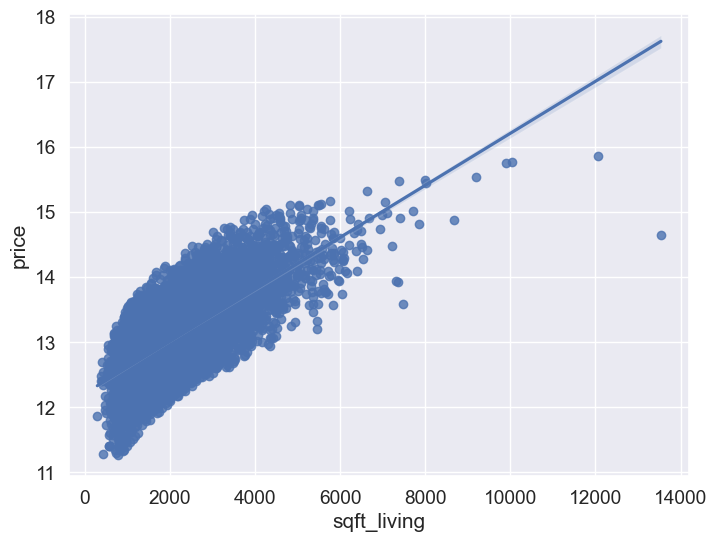

In [20]:
data = pd.concat([df_train['price'], df_train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living', y="price", data=data)

In [21]:
df_train.loc[df_train['sqft_living'] > 13000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8912,8912,20140505T000000,14.639686,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


위의 값을 봤을 때, 다른값들에 비해 sqft_living만 비정상적으로 꽤 큼.  
추가적으로 price와 상관성이 높은 `grade`와 다른 평수들을 살펴봐도 이상치라 판단해서 제거

In [22]:
df_train = df_train.loc[df_train['id']!=8990]

#### grade

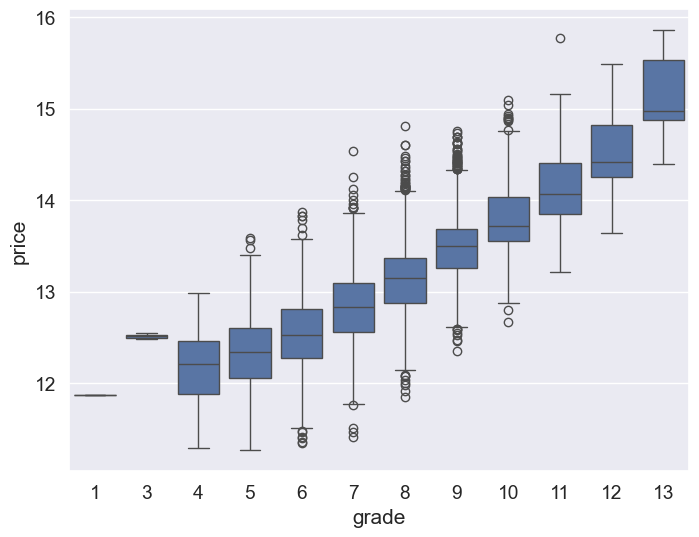

In [23]:
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

In [24]:
df_train.loc[(df_train['price']>12) & (df_train['grade'] == 3)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,2302,20150225T000000,12.476104,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4123,4123,20141104T000000,12.542548,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549


가장 중요한 변수인 grade, sqft_ 모두 낮은 것을 볼 수 있습니다.  
그래서 두 값 모두 이상치로 규정하고 제거하도록 하겠습니다. 

In [25]:
df_train.loc[(df_train['price']>14.7) & (df_train['grade'] == 8)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7173,7173,20140813T000000,14.808763,5,4.0,4230,27295,2.0,1,4,...,8,3230,1000,1949,1985,98033,47.6803,-122.214,2660,27295


In [26]:
df_train.loc[(df_train['price']>15.5) & (df_train['grade'] == 11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,15.77031,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.214,3930,25449


위의 3값 모두 특별한 이유가 없이 가격이 높아 보이므로 이상치로 규정하고 제거하도록 하겠습니다. 

In [27]:
df_train = df_train.loc[df_train['id']!=456]
df_train = df_train.loc[df_train['id']!=2302]
df_train = df_train.loc[df_train['id']!=4123]
df_train = df_train.loc[df_train['id']!=7259]
df_train = df_train.loc[df_train['id']!=2777]

#### bedrooms 

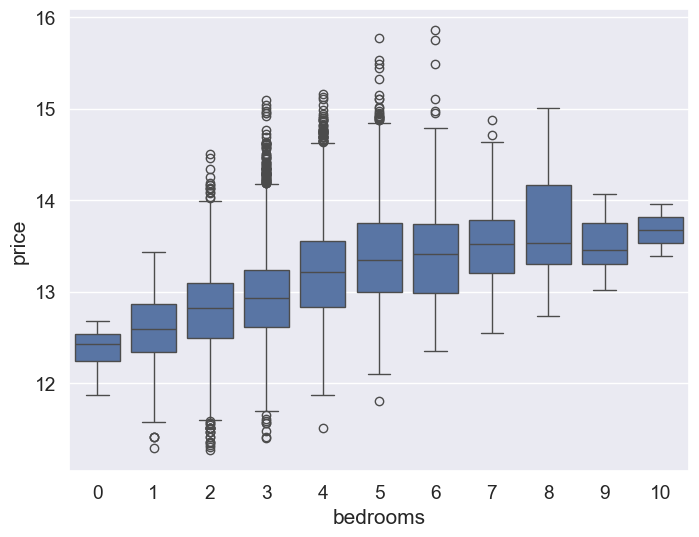

In [28]:
data = pd.concat([df_train['price'], df_train['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='bedrooms', y="price", data=data)

침실의 수를 보면 우상향의 상관관계를 가짐.  
그런데 bedrooms가 2 ~ 6은 분산이 매우 큰 것을 확인... 이상치인가?  
이상치라고 판단하기엔 다른 값들의 영향으로 price가 높게 나온것 같아서 그대로 냅두기로 결정  

In [29]:
skew_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    df_train[c] = np.log1p(df_train[c].values)
    df_test[c] = np.log1p(df_test[c].values)

In [30]:
for df in [df_train,df_test]:
    df['date'] = df['date'].apply(lambda x: x[0:8])
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [31]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013,12.309987,3,1.00,7.074117,8.639588,1.0,0,0,...,7,7.074117,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,1,20150225,12.100718,2,1.00,6.647688,9.210440,1.0,0,0,...,6,6.647688,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
2,2,20150218,13.142168,3,2.00,7.427144,8.997271,1.0,0,0,...,8,7.427144,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503
3,3,20140627,12.458779,3,2.25,7.447751,8.827615,2.0,0,0,...,7,7.447751,0.0,1995,1995.0,98003,47.3097,-122.327,2238,6819
4,4,20150115,12.583999,3,1.50,6.966967,9.181118,1.0,0,0,...,7,6.966967,0.0,1963,1963.0,98198,47.4095,-122.315,1650,9711


In [32]:
for df in [df_train,df_test]:
    # 방의 전체 갯수 
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    
    # 거실의 비율 
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']
    
    df['sqft_total_size'] = df['sqft_above'] + df['sqft_basement']
    
    # 면적 대비 거실의 비율 
    df['sqft_ratio_1'] = df['sqft_living'] / df['sqft_total_size']
    
    df['sqft_ratio15'] = df['sqft_living15'] / df['sqft_lot15'] 
    
    # 재건축 여부 
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x: 0 if x == 0 else 1)
    df['date'] = df['date'].astype('int')

아래는 집값 같은 경우는 비슷한 지역에 영향을 받아서 위치별 평당가격을 책정하여 연산함.
평균과 분산을 구해서 책정

In [33]:
df_train['per_price'] = df_train['price']/df_train['sqft_total_size']
zipcode_price = df_train.groupby(['zipcode'])['per_price'].agg({'mean','var'}).reset_index()
df_train = pd.merge(df_train,zipcode_price,how='left',on='zipcode')
df_test = pd.merge(df_test,zipcode_price,how='left',on='zipcode')

for df in [df_train,df_test]:
    df['zipcode_mean'] = df['mean'] * df['sqft_total_size']
    df['zipcode_var'] = df['var'] * df['sqft_total_size']
    del df['mean']; del df['var']

In [34]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,total_rooms,sqft_ratio,sqft_total_size,sqft_ratio_1,sqft_ratio15,is_renovated,per_price,zipcode_mean,zipcode_var
0,0,20141013,12.309987,3,1.00,7.074117,8.639588,1.0,0,0,...,5650,4.00,0.818803,7.074117,1.0,0.237168,0,1.740145,9.368147,1.214207
1,1,20150225,12.100718,2,1.00,6.647688,9.210440,1.0,0,0,...,8062,3.00,0.721756,6.647688,1.0,0.337385,0,1.820290,9.257745,1.023549
2,2,20150218,13.142168,3,2.00,7.427144,8.997271,1.0,0,0,...,7503,5.00,0.825489,7.427144,1.0,0.239904,0,1.769478,11.307711,0.826257
3,3,20140627,12.458779,3,2.25,7.447751,8.827615,2.0,0,0,...,6819,5.25,0.843688,7.447751,1.0,0.328201,0,1.672824,10.626177,1.012780
4,4,20150115,12.583999,3,1.50,6.966967,9.181118,1.0,0,0,...,9711,4.50,0.758837,6.966967,1.0,0.169910,0,1.806238,10.032009,1.002206


## 데이터 학습

In [35]:


train_columns = [c for c in df_train.columns if c not in ['id','price','per_price']]


In [36]:


from sklearn.model_selection import train_test_split
df_train1, df_train2 = train_test_split(df_train, train_size = 0.8, random_state=3)



In [37]:
from sklearn.ensemble import RandomForestRegressor
B = RandomForestRegressor(n_estimators=28,random_state=0)
B.fit(df_train1[train_columns], df_train1['price'])
score = B.score(df_train2[train_columns], df_train2['price'])
print(format(score,'.3f'))

0.877


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

gboost = GradientBoostingRegressor(random_state=42)
xgboost = xgb.XGBRegressor(random_state=42)
lightgbm = lgb.LGBMRegressor(random_state=42)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]


## 모델 평가

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [41]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [42]:

def get_scores(models, train, y):
    """
    models: [
       {'name': str, 'model': estimator_instance},
       ...
    ]
    train:   DataFrame of features
    y:       Series or array of target
    """
    results = {}
    
    for item in models:
        name  = item['name']
        model = item['model']
        
        X_tr, X_te, y_tr, y_te = train_test_split(
            train, y, random_state=2019, test_size=0.2
        )
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        
        results[name] = rmse(y_te, y_pred)
    
    # DataFrame으로 변환: index가 모델명, 컬럼은 RMSE
    score_df = (
        pd.DataFrame.from_dict(results, orient='index', columns=['RMSE'])
          .sort_values('RMSE', ascending=False)
    )
    return score_df




In [43]:
score_df = get_scores(models, df_train, df_train['price'])
print(score_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4932
[LightGBM] [Info] Number of data points in the train set: 12023, number of used features: 30
[LightGBM] [Info] Start training from score 13.049936
                          RMSE
XGBoost           76910.371170
LightGBM          48958.169702
GradientBoosting  14034.329393


In [44]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(
    max_depth=10,
    n_estimators=100,
    random_state=42
)
model.fit(df_train[train_columns], df_train['price'])
prediction = model.predict(df_test[train_columns])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4206
[LightGBM] [Info] Number of data points in the train set: 15029, number of used features: 27
[LightGBM] [Info] Start training from score 13.048202


In [45]:
df_test['predicted_price'] = np.expm1(prediction)
print(df_test[['id', 'predicted_price']].head())


      id  predicted_price
0  15035     4.877890e+05
1  15036     4.696211e+05
2  15037     1.416774e+06
3  15038     3.126953e+05
4  15039     3.326135e+05


## submission파일 작성 및 종료

In [46]:
from os.path import join
import numpy as np
"""
아래의 과정을 수행하는 `save_submission(model, train, y, test, model_name, rmsle)` 함수를 구현해 주세요.
1. 모델을 `train`, `y`로 학습시킵니다.
2. `test`에 대해 예측합니다.
3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장합니다.
"""

# 코드 작성
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(df_train[train_columns], df_train['price'])
    prediction = model.predict(df_test[train_columns])
    prediction = np.expm1(prediction)
    data_dir = '/Users/gwanghunlee/Documents/EX02/data/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [47]:
save_submission(model, df_train[train_columns], df_train['price'], df_test[train_columns], 'LightGBM', 100000)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4206
[LightGBM] [Info] Number of data points in the train set: 15029, number of used features: 27
[LightGBM] [Info] Start training from score 13.048202
/Users/gwanghunlee/Documents/EX02/data/data/submission_LightGBM_RMSLE_100000.csv saved!


## 오늘의 회고
- 기나긴 첫 캐글이였다...
- 현재 2:22... 더이상 머리도 안돌아가고 더 하고 싶은건 있지만 이제 내일을 위해 자도록 하자.
- 지역별 평당 단가를 계산해서 feature를 새로 만들고 데이터를 학습시킨 부분이 전처리 작업중 가장 오래 걸리면서도 아이디어가 좋았다고 생각한다. 캐글에서 다른 분이 한 걸 보고 열심히 따라 하려고 노력했다... 다시 찾으려니 어디에 있는지 못찾아서 첨부는 못하지만 그래도 좋은 인사이트를 주셔서 감사합니다.
- 데이터 학습시 모델의 하이퍼 파라미터를 조절하지 못한게 아쉽다.. 그 때문에 점수가 좀 낮게 나온게 아닐까...
- 하이퍼 파라미터 조절하는게 노드에 나와있었지만 아직 완벽히 숙달하지 못한게 이슈였고, 다시 그 노드를 씹어보면서 하이퍼파라미터에 대한 공부를 해야겠다.
- 노드에서 진행한 함수 만드는것은 앞으로도 유용하게 써보겠다..! 이번에 다른 부분도 만들어 보고 싶었는데 일단 끝내고 보니 시간이ㅠㅠ 다음에는 다른곳에 쓸수있는 함수도 고민해봐야겠다.
- 이제 자자.. 내일도 공부해야지...
